# 올레거르멍: 사업화 데이터분석

## Contents
* Article: 쓰레기와 제주 관광, 플로깅에 대한 인식 조사
* Correlation: 쓰레기와 유동인구 간 상관관계 조사: "플로깅 스팟 추천 시스템"의 정당성 확보
* Survey: 플로깅 인식 설문조사

### Article Analysis - 1. 오버 투어리즘
쓰레기가 제주 관광의 큰 문제로 인식되고 있음을 Word2Vec과 코사인 유사도 분석법을 통해 보이고, 이를 워드클라우드로 시각화한다

In [1]:
# 강준서 invalidid56@snu.ac.kr
# (1) 기사 분석 - a: 워드클라우드와 Cos-Sim 기법을 이용해 쓰레기가 제주 관광의 큰 문제임을 보인다
# (2) 기사 분석 - b: 워드클라우드와 Cos-Sim 기법을 이용해 플로깅에 대한 대중의 인식을 보인다


import pandas as pd
from konlpy.tag import Okt
from gensim.models.word2vec import Word2Vec
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

tagger = Okt()

In [2]:
stop_words = '등 것 이 말 명 전 그 고 위 때문 마련 저 라고 수 기자'
stop_words = stop_words.split(' ')

네이버 뉴스에서 '오버 투어리즘' 키워드로 최근 기사를 크롤링하고, 이를 코퍼스로 정리하였다

In [3]:
kw = '관광 쓰레기'
corpus = list(pd.read_csv('NaverNews_{0}.csv'.format(kw))['content'].values)
corpus = [[word for word in tagger.nouns(line) if word not in stop_words] for line in corpus]
model = Word2Vec(corpus, min_count=1, workers=4)
model.wv.most_similar('쓰레기', topn=15)

[('관광객', 0.9933182001113892),
 ('활동', 0.9929261803627014),
 ('관광', 0.9920092225074768),
 ('제주', 0.9916560649871826),
 ('환경', 0.9906752705574036),
 ('며', 0.9904170036315918),
 ('플라스틱', 0.9903755187988281),
 ('지역', 0.990149199962616),
 ('지난', 0.9899449944496155),
 ('해수욕장', 0.9898496866226196),
 ('위해', 0.9898378849029541),
 ('폐기물', 0.9897468686103821),
 ('사람', 0.9896280765533447),
 ('마을', 0.9894388318061829),
 ('주민', 0.9887443780899048)]

코사인 유사도 분석 결과, **쓰레기**와 유사한 맥락에서 등장하는 단어로 **관광객**과 **제주**, **해수욕장**, **폐기물** 등이 높게 나오는 것을 통해, 제주도의 관광 쓰레기 문제가 최근 대두되고 있음을 분석할 수 있다. 이를 워드 클라우드로 시각화한 결과는 아래와 같다.

In [4]:
word_list = sum(corpus, [])
counts = Counter(word_list)
tags = counts.most_common(40)

In [5]:
jeju_map = Image.open('jeju_gray.jpg')
img_array = np.array(jeju_map)

wc = WordCloud(background_color='Black', width=1300, height=650, scale=2.0, max_font_size=250,
               font_path='/home/invalidid56/MaruBuri-Light.otf', mask=img_array, colormap='PuBu')
cloud = wc.generate_from_frequencies(dict(tags))

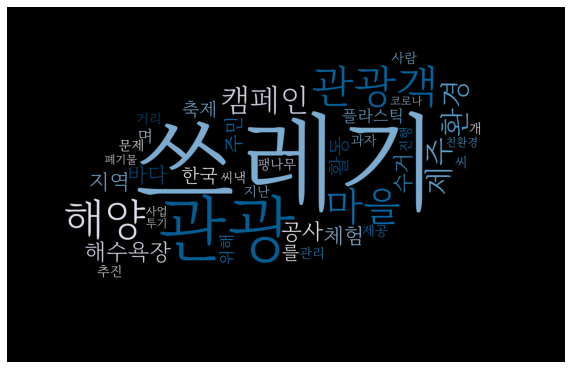

In [6]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()


### Article Analysis - 2. 플로깅 인식 조사

플로깅에 대한 인식을 있음을 Word2Vec과 코사인 유사도 분석법을 통해 분석하고, 이를 워드클라우드로 시각화한다

In [7]:
kw = '플로깅'
corpus = list(pd.read_csv('NaverNews_{0}.csv'.format(kw))['content'].values)
corpus = [[word for word in tagger.nouns(line) if word not in stop_words] for line in corpus]
model = Word2Vec(corpus, min_count=1, workers=4)
model.wv.most_similar('플로깅', topn=15)

[('캠페인', 0.9954656362533569),
 ('깅', 0.994983434677124),
 ('진행', 0.994246244430542),
 ('쓰레기', 0.9942013025283813),
 ('플로', 0.9941651821136475),
 ('위해', 0.9939453601837158),
 ('활동', 0.993931233882904),
 ('참여', 0.9939051866531372),
 ('코웨이', 0.9935499429702759),
 ('통해', 0.993479311466217),
 ('환경', 0.9934366345405579),
 ('비건', 0.993219256401062),
 ('행사', 0.9932098388671875),
 ('지역', 0.9929946660995483),
 ('사용', 0.9928939938545227)]

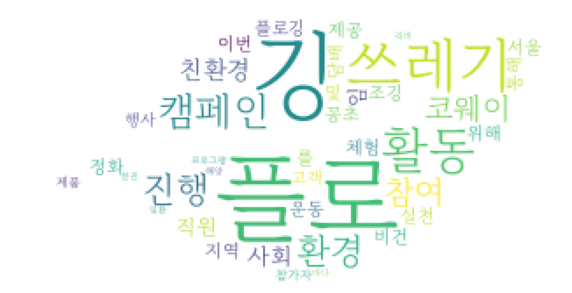

In [8]:
word_list = sum(corpus, [])
counts = Counter(word_list)
tags = counts.most_common(40)

leaf = Image.open('leaf.png')
img_array = np.array(leaf)

wc = WordCloud(background_color='White', font_path='/home/invalidid56/MaruBuri-Light.otf', mask=img_array)
cloud = wc.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

플로깅 기사 분석을 통해 얻을 수 있었던 인사이트~~~

### Correlation. 쓰레기와 유동인구 간 상관관계 조사: "플로깅 스팟 추천 시스템"의 정당성 확보

본 서비스가 제공하는 플로깅 스팟 추천 시스템은 유동인구 밀집도 데이터를 기반으로 한다.
이는 관광객의 수가 쓰레기 배출량과 비례한다는 가설 하에 출발하는데, 이를 입증하기 위해 **제주특별자치도**에서 **2018년부터 2021년까지** 조사한 **클린하우스 배출량**과 **유동인구 매쉬업** 데이터를 활용하였다

In [9]:
file_list = ['2020', '2021']

temp = []
for file in file_list:
    temp.append(pd.read_csv(file+'.csv', encoding='euc-kr'))

df = pd.concat(temp)

In [10]:
df

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자
0,2020-01-01,제주시,한림읍,465915.674,29450.525,207338.527,702704.726,3.019900e+06,9.039400e+04,2020-12-15
1,2020-01-01,서귀포시,동홍동,834450.293,53729.125,329734.356,1217913.774,4.311300e+06,1.282750e+05,2020-12-15
2,2020-01-01,서귀포시,효돈동,90842.937,5614.227,53647.270,150104.435,1.466500e+05,4.392000e+03,2020-12-15
3,2020-01-01,제주시,봉개동,194961.196,15117.647,217784.633,427863.476,1.313800e+06,3.927600e+04,2020-12-15
4,2020-01-01,서귀포시,예래동,391435.301,90161.670,1013959.738,1495556.709,3.947000e+05,1.181500e+04,2020-12-15
...,...,...,...,...,...,...,...,...,...,...
6031,2021-05-31,서귀포시,예래동,943.000,31550.000,170606.530,77852.531,2.184774e+04,2.703068e+05,2021-07-26
6032,2021-05-31,제주시,봉개동,8455.000,282800.000,106598.799,98871.261,2.886362e+04,2.343337e+05,2021-07-26
6033,2021-05-31,제주시,이도2동,221097.000,7405450.000,521019.062,1180270.018,1.760340e+05,1.877323e+06,2021-07-26
6034,2021-05-31,서귀포시,대륜동,19536.000,653100.000,202607.776,338410.192,4.034091e+04,5.813589e+05,2021-07-26


이 데이터를 토대로 유동인구와 쓰레기 배출량 간의 관계를 아래와 같이 나타내었다

findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


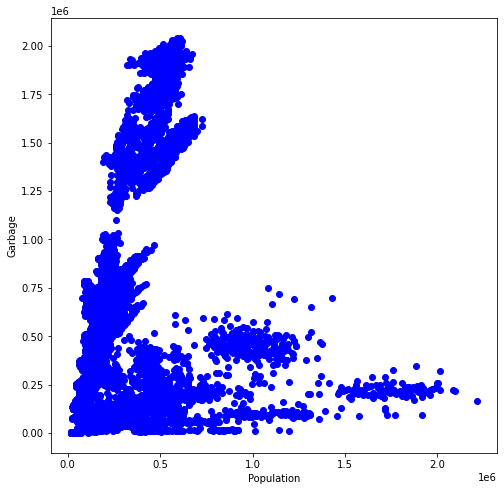

In [11]:
plt.figure(
 figsize=(8, 8)
)

plt.plot(
    df['방문인구'],
    df['배출량'],
    'bo'
)
plt.ylabel('Garbage')
plt.xlabel('Population')

plt.show()

In [12]:
np.corrcoef(df['배출량'], df['총 유동인구'])[0, 1]

0.1939275762992262

산점도와 상관계수를 분석하였을 때 일반적으로 유동인구와 배출량 간의 관계를 하나의 모델로 설명할 수 없다는 결론을 도출할 수 있었다.

위의 실험 관계를 해석하기 위해, 우리는 두 개의 가설을 세웠다 숙박업소가 밀집된 지역과 체험형 관광 프로그램이 밀집된 지역의 쓰레기 배출 양상이 다르게 형성될 것이라는 **숙박형-체험형 가설**과 성수기(관광객 위주)와 비수기(도민 위주)의 쓰레기 배출 양상이 다를 것이라는 **성수기-비수기 가설**이다. 이 두 가설 모두, 위의 산점도가 두 개의 축을 이루고 있다는 점에서 착안하여, 서로 다른 특성을 지닌 두 집단을 상정하여 이를 설명하고자 시도하였다.

#### 숙박형-체험형 가설

위의 가설들을 실험하기에 앞서, 제주관광포털에서 제공하는 비짓제주 로그 데이터를 통해 제주시에 존재하는 숙박업소와 관광업소의 리스트를 추출하였다.

In [13]:
import os

file_list = os.listdir('visitjeju_log')
temp = []
for file in file_list:
    temp.append(pd.read_csv(os.path.join('visitjeju_log', file)))
attractions = pd.concat(temp)[['CL_NM', 'AREA_NM', 'ADDR']]
housing = attractions[attractions['CL_NM']=='숙박']
housing

,CL_NM,AREA_NM,ADDR
0,숙박,메리어트관 제주신화월드 호텔앤리조트,제주특별자치도 서귀포시 안덕면 신화역사로304번길 38
1,숙박,1915 지오하우스,제주특별자치도 서귀포시 성산읍 성산등용로 14
2,숙박,521 게스트 하우스,제주특별자치도 제주시 애월읍 중용길 52-1 (신엄리) 521 게스트 하우스
3,숙박,가까이에파도소리,제주도 제주시 외도2동 연대마을길 44
4,숙박,가름게스트하우스,제주특별자치도 서귀포시 법환하로9번길 10
...,...,...,...
3386,숙박,해성파크텔,제주특별자치도 서귀포시 천제연로 158-4
3428,숙박,호텔섬오름,제주특별자치도 서귀포시 막숙포로 114
3444,숙박,제주도유,제주특별자치도 제주시 조천읍 신촌10길 40
3495,숙박,노블레스호텔,제주특별자치도 제주시 연동8길 31


In [14]:
attractions = attractions[attractions['CL_NM']=='관광지']
attractions

,CL_NM,AREA_NM,ADDR
2300,관광지,산천단곰솔,제주특별자치도 제주시 516로 3041-24
2301,관광지,테디베어사파리 테지움,제주특별자치도 제주시 애월읍 평화로 2159
2302,관광지,휘닉스 르쏠레이테라피,제주특별자치도 서귀포시 성산읍 섭지코지로 107 휘닉스제주아일랜드리조트 블루동 1층
2303,관광지,마라도(마라해양도립공원),제주특별자치도 서귀포시 대정읍 마라로101번길 46
2304,관광지,와흘본향당,제주특별자치도 제주시 조천읍 와흘리 1274-1
...,...,...,...
3609,관광지,성읍목장,제주특별자치도 서귀포시 표선면 성읍리 1734
3611,관광지,케이제주씨워킹,제주특별자치도 서귀포시 대정읍 최남단해안로 120
3612,관광지,명월팽나무군락,제주특별자치도 제주시 한림읍 명월로 71
3613,관광지,제주올레 8코스,제주특별자치도 서귀포시 예래해안로 256


이 데이터에서, 제주도의 읍면동별 관광지, 숙박업체 개수를 조사하기 위해 아래와 같이 데이터를 처리하였다

In [15]:
import re

province = re.compile("[ㄱ-힣0-9]*[읍면동]")

def check(x):
    try:
        if province.search(x):
            return province.search(x).group()
        else:
            return pd.NA
    except TypeError:
        return pd.NA

attractions['ADDR'] = attractions['ADDR'].map(check)
housing['ADDR'] = housing['ADDR'].map(check)

In [16]:
attractions = attractions.dropna().reset_index(drop=True)
housing = housing.dropna().reset_index(drop=True)

In [17]:
count_housing = housing.groupby('ADDR').count()
count_attr = attractions.groupby('ADDR').count()

In [18]:
count_housing.sort_values(by='CL_NM')

,CL_NM,AREA_NM
ADDR,,
2동,12,12
하예하동,12,12
진동,12,12
중산간동,12,12
용담삼동,12,12
외도2동,12,12
호근동,12,12
선돌목동,12,12
동문동,12,12


위의 자료에서, *구좌읍, 애월읍, 성산읍, 한림읍, 안덕면, 남원읍*이 숙박업소가 많은 상위 5개 지역임을 확인하였다

In [19]:
count_attr.sort_values(by='CL_NM')

,CL_NM,AREA_NM
ADDR,,
가동,2,2
신효동,10,10
오등동,10,10
오라3동,10,10
용강동,10,10
...,...,...
한림읍,808,808
조천읍,1058,1058
애월읍,1114,1114


위의 자료에서, *안덕면, 구좌읍, 애월읍, 조천읍, 한림읍*이 관광업소가 많은 상위 5개 지역임을 확인하였다

따라서 이를 통해 안덕면, 구좌읍, 애월읍은 관광업소와 숙박업소 둘 다 많고, 성산읍, 남원읍은 숙박 위주이며, 조천읍, 한림읍은 관광 위주임을 조사할 수 있었다

따라서 이를 근거로, 관광 위주 지역과 숙박 위주 지역의 방문인구-폐기물 배출량 그래프를 시각화하였다

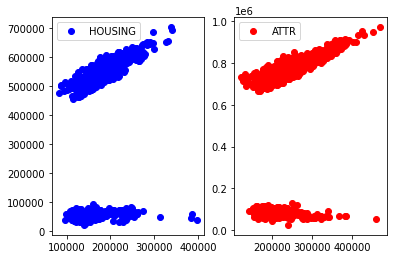

In [20]:
housing_df = df[(df['읍면동명']=='성산읍')|(df['읍면동명']=='남원읍')]

plt.subplot(121)
plt.plot(housing_df['방문인구'],
        housing_df['배출량'],
        'bo', label='HOUSING')
plt.legend()

attr_df = df[(df['읍면동명']=='조천읍')|(df['읍면동명']=='한림읍')]

plt.subplot(122)
plt.plot(attr_df['방문인구'],
        attr_df['배출량'],
        'ro', label='ATTR')
plt.legend()

plt.show()

In [21]:
# 상관관계 분석
print('숙박형 업소 밀집 지역 인구-쓰레기 상관관계: {0}'.format(np.corrcoef(housing_df['배출량'], housing_df['방문인구'])[0, 1]))

# 상관관계 분석
print('체험형 관광업소 밀집 지역 인구-쓰레기 상관관계: {0}'.format(np.corrcoef(attr_df['배출량'], attr_df['방문인구'])[0, 1]))

숙박형 업소 밀집 지역 인구-쓰레기 상관관계: 0.3603739979887512
체험형 관광업소 밀집 지역 인구-쓰레기 상관관계: 0.37781588246994546


이 경우에도 두 모델로 이원화되는 결과를 낳고, 충분한 상관관계로 설명하지 못하는 (0.36 내외) 결과를 낳았으므로, 관광 위주 지역-숙박 위주 지역 가설은 거짓으로 판단하였다

#### 성수기-비수기 가설

In [22]:
df

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자
0,2020-01-01,제주시,한림읍,465915.674,29450.525,207338.527,702704.726,3.019900e+06,9.039400e+04,2020-12-15
1,2020-01-01,서귀포시,동홍동,834450.293,53729.125,329734.356,1217913.774,4.311300e+06,1.282750e+05,2020-12-15
2,2020-01-01,서귀포시,효돈동,90842.937,5614.227,53647.270,150104.435,1.466500e+05,4.392000e+03,2020-12-15
3,2020-01-01,제주시,봉개동,194961.196,15117.647,217784.633,427863.476,1.313800e+06,3.927600e+04,2020-12-15
4,2020-01-01,서귀포시,예래동,391435.301,90161.670,1013959.738,1495556.709,3.947000e+05,1.181500e+04,2020-12-15
...,...,...,...,...,...,...,...,...,...,...
6031,2021-05-31,서귀포시,예래동,943.000,31550.000,170606.530,77852.531,2.184774e+04,2.703068e+05,2021-07-26
6032,2021-05-31,제주시,봉개동,8455.000,282800.000,106598.799,98871.261,2.886362e+04,2.343337e+05,2021-07-26
6033,2021-05-31,제주시,이도2동,221097.000,7405450.000,521019.062,1180270.018,1.760340e+05,1.877323e+06,2021-07-26
6034,2021-05-31,서귀포시,대륜동,19536.000,653100.000,202607.776,338410.192,4.034091e+04,5.813589e+05,2021-07-26


In [23]:
df['월'] = df['일자'].map(lambda x: int(x[5:7]))

busy = df[(5<=df['월'])&(df['월']<=8)]
busy

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자,월
5077,2020-05-01,서귀포시,대천동,23266.0,778800.0,124007.602,178009.780,12909.0409,3.149264e+05,2021-07-30,5
5078,2020-05-01,제주시,삼도1동,53463.0,1789350.0,119907.728,226633.931,15696.3958,3.622381e+05,2021-07-30,5
5079,2020-05-01,제주시,일도1동,37475.0,1253300.0,57975.965,34198.557,5697.0340,9.787156e+04,2021-07-30,5
5080,2020-05-01,서귀포시,예래동,4568.0,152800.0,148417.814,78193.087,13698.1199,2.403090e+05,2021-07-30,5
5081,2020-05-01,제주시,일도2동,139720.0,4678200.0,208768.805,659998.287,35554.3589,9.043215e+05,2021-07-30,5
...,...,...,...,...,...,...,...,...,...,...,...
6031,2021-05-31,서귀포시,예래동,943.0,31550.0,170606.530,77852.531,21847.7450,2.703068e+05,2021-07-26,5
6032,2021-05-31,제주시,봉개동,8455.0,282800.0,106598.799,98871.261,28863.6232,2.343337e+05,2021-07-26,5
6033,2021-05-31,제주시,이도2동,221097.0,7405450.0,521019.062,1180270.018,176034.0168,1.877323e+06,2021-07-26,5
6034,2021-05-31,서귀포시,대륜동,19536.0,653100.0,202607.776,338410.192,40340.9060,5.813589e+05,2021-07-26,5


In [24]:
not_busy = df[(11<=df['월'])|(df['월']<=3)]
not_busy

,일자,시도명,읍면동명,거주인구,근무인구,방문인구,총 유동인구,선불금액,배출량,데이터기준일자,월
0,2020-01-01,제주시,한림읍,465915.674,29450.525,207338.527,702704.726,3.019900e+06,9.039400e+04,2020-12-15,1
1,2020-01-01,서귀포시,동홍동,834450.293,53729.125,329734.356,1217913.774,4.311300e+06,1.282750e+05,2020-12-15,1
2,2020-01-01,서귀포시,효돈동,90842.937,5614.227,53647.270,150104.435,1.466500e+05,4.392000e+03,2020-12-15,1
3,2020-01-01,제주시,봉개동,194961.196,15117.647,217784.633,427863.476,1.313800e+06,3.927600e+04,2020-12-15,1
4,2020-01-01,서귀포시,예래동,391435.301,90161.670,1013959.738,1495556.709,3.947000e+05,1.181500e+04,2020-12-15,1
...,...,...,...,...,...,...,...,...,...,...,...
3591,2021-03-31,서귀포시,영천동,20727.000,692300.000,119354.224,82038.092,1.505946e+04,2.164518e+05,2021-07-26,3
3592,2021-03-31,서귀포시,예래동,3654.000,122050.000,145687.334,77067.272,1.919910e+04,2.419537e+05,2021-07-26,3
3593,2021-03-31,제주시,이도2동,201704.000,6754300.000,600729.415,1165136.177,1.433257e+05,1.909191e+06,2021-07-26,3
3594,2021-03-31,서귀포시,정방동,8126.000,281300.000,88906.644,45799.351,7.444722e+03,1.421507e+05,2021-07-26,3


findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


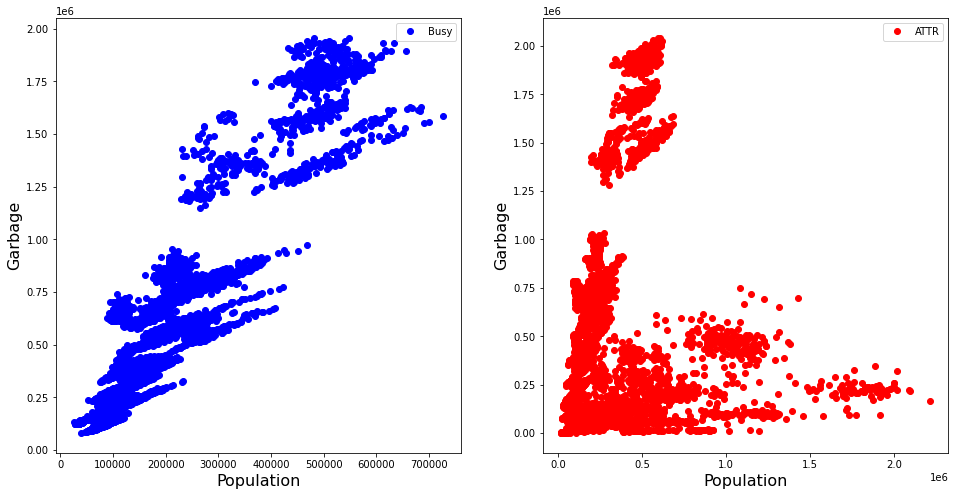

In [25]:
f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].plot(busy['방문인구'],
        busy['배출량'],
        'bo', label='Busy')
axes[0].legend()
axes[0].set_xlabel('Population', fontsize=16)
axes[0].set_ylabel('Garbage', fontsize=16)

axes[1].plot(not_busy['방문인구'],
        not_busy['배출량'],
        'ro', label='ATTR')
axes[1].legend()
axes[1].set_xlabel('Population', fontsize=16)
axes[1].set_ylabel('Garbage', fontsize=16)

plt.show()

In [26]:
# 상관관계 분석
print('성수기 방문인구-쓰레기 생산량 상관계수: {0}'.format(np.corrcoef(busy['배출량'], busy['방문인구'])[0, 1]))

성수기 방문인구-쓰레기 생산량 상관계수: 0.9289767463068119


위의 성수기 그래프에서 방문 인구와 쓰레기 생산량 간의 **강한 양의 상관관계**(**0.92**)를 도출해 낼 수 있었고, 이로써 **관광객이 많이 모이는 지역에 쓰레기가 많이 생성된다**는 본래의 가설을 증명할 수 있었다.

### Survey. 플로깅 인식 설문조사

올레거르멍의 플로깅 서비스에 대한 타당성을 확보하기 위해 아래와 같은 질문이 담긴 설문조사를 무작위로 선별된, 72명의 사람들에게 배포하여 플로깅에 대한 인식 조사를 수행하였다.

![1.jpg](./1.jpg) ![2.jpg](./2.jpg)

In [27]:
survey = pd.read_excel('plogging_form.xlsx').drop(['타임스탬프'], axis=1)
survey

,제주도 여행을 한 경험이 있나요?,제주도 여행에서 가장 불만이었던 점이 무엇인가요?,"최근에 <이상한 변호사 우영우>에서 등장하기도 했던, 조깅하면서 쓰레기를 줍는 행위인 '플로깅'에 대해 알고 계신가요?",'플로깅'을 할 의향이 있으신가요? 만약 있으시다면 그 이유가 무엇인가요?
0,아니요,교통 문제,아니오,의향이 있다. 건강과 환경 모두에 도움이 되는 행위이기 때문에라도 재밌게 참여할 수...
1,예,교통 문제,아니오,.
2,예,교통 문제,예,본인이 여행하면서 생기는 쓰레기라던지 여행을 다니며 보기 싫은 쓰레기들은 늘 주워가...
3,예,교통 문제,아니오,아니요
4,예,기타,예,환경보호 :)
...,...,...,...,...
67,아니요,기타,예,"있어요. 걸으면서 쓰레기도 줍고 내 건강에도, 환경에도 좋은 것 같아서요"
68,예,쓰레기 문제,예,환경보호에 도움이 되기 때문
69,예,교통 문제,예,x
70,예,교통 문제,예,의도가 좋아서 생각 나면 하려고 할 듯하다.


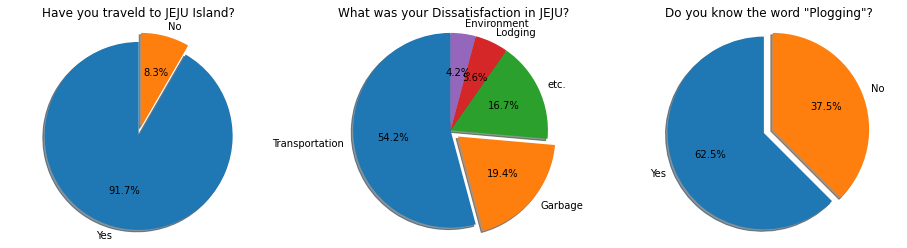

In [53]:
f, axes = plt.subplots(1, 3, figsize=(16, 4))

# 제주도 여행 경험
labels = ('Yes', 'No')
total = len(survey['제주도 여행을 한 경험이 있나요?'])
yes = len(survey[survey['제주도 여행을 한 경험이 있나요?'] == '예'])
no = total - yes
sizes = [yes, no]

axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
axes[0].axis('equal')
axes[0].set_title('Have you traveld to JEJU Island?')

# 제주도 여행 중 쓰레기 문제
problem = survey['제주도 여행에서 가장 불만이었던 점이 무엇인가요?']
total = len(problem)
p_c = dict(problem.value_counts())

axes[1].pie(p_c.values(), labels=['Transportation', 'Garbage', 'etc.', 'Lodging', 'Environment'],
            autopct='%1.1f%%', shadow=True, startangle=90, explode=(0, 0.1, 0, 0, 0))
axes[1].axis('equal')

axes[1].set_title('What was your Dissatisfaction in JEJU?')

# 플로깅에 대한 인지도
knownledge= survey["최근에 <이상한 변호사 우영우>에서 등장하기도 했던, 조깅하면서 쓰레기를 줍는 행위인 '플로깅'에 대해 알고 계신가요?"]
total = len(knownledge)
k_c = dict(knownledge.value_counts())

axes[2].pie(k_c.values(), labels=['Yes', 'No'],
            autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0))
axes[2].axis('equal')

axes[2].set_title('Do you know the word "Plogging"?')


plt.show()


In [67]:
reason = survey["'플로깅'을 할 의향이 있으신가요? 만약 있으시다면 그 이유가 무엇인가요?"]
reason = list(reason)

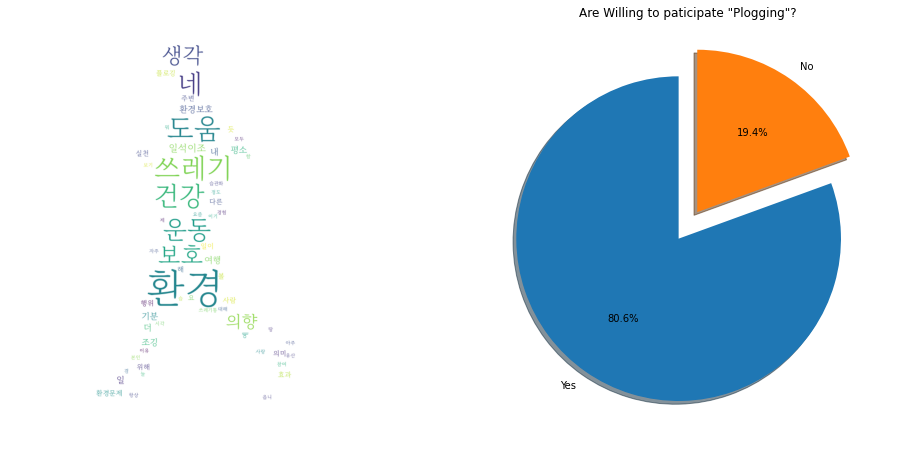

In [72]:
denial_words = ['없음', '아뇨', '몰라요', '제한', '없습니다', '없']

corpus = []; negative = 0; total=len(reason)
for line in reason:
    words = tagger.morphs(line)
    if (set(denial_words) & set(words)):
        negative += 1
    else:
        corpus += [word for word in tagger.nouns(line) if word not in stop_words]
        
counts = Counter(corpus)
tags = counts.most_common(60)

jeju_map = Image.open('jogging.png')
img_array = np.array(jeju_map)

wc = WordCloud(background_color='White', width=1300, height=650, scale=2.0, max_font_size=120,
               font_path='/home/invalidid56/MaruBuri-Light.otf', mask=img_array)
cloud = wc.generate_from_frequencies(dict(tags))

f, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(cloud)
axes[0].axis('off')

positive = total - negative
axes[1].pie((positive, negative), labels=['Yes', 'No'],
            autopct='%1.1f%%', shadow=True, startangle=90, explode=(0.1, 0.1))
axes[1].set_title('Are you Willing to paticipate "Plogging"?')
plt.show()